In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
from torchinfo import summary

In [81]:
filename="../textbook.png"

In [82]:
imgNP=cv2.imread(filename)/255
print(imgNP.shape)

(401, 321, 3)


In [83]:
imgNP2=cv2.resize(imgNP, (50,50))
imgNP2.shape

(50, 50, 3)

In [84]:
grayNP = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)/255
grayNP2 = cv2.resize(grayNP, (50,50))
grayNP.shape, grayNP2.shape

((401, 321), (50, 50))

In [85]:
# numpy => FloatTensor로 변환
img = torch.FloatTensor(imgNP).permute(2,0,1)
img2 = torch.FloatTensor(imgNP2).permute(2,0,1)
gray = torch.FloatTensor(grayNP).unsqueeze(0)
gray2 = torch.FloatTensor(grayNP2).unsqueeze(0)

In [86]:
img.shape, img2.shape, gray.shape, gray2.shape

(torch.Size([3, 401, 321]),
 torch.Size([3, 50, 50]),
 torch.Size([1, 401, 321]),
 torch.Size([1, 50, 50]))

In [87]:
conLayer = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, stride=1, padding=0)
conLayer2 = nn.Conv2d(in_channels=5, out_channels=3, kernel_size=3, stride=1, padding='same')

In [88]:
output=conLayer(gray2)
output2=conLayer2(output)
output2.shape, output2.ndim

(torch.Size([3, 48, 48]), 3)

In [89]:
pol1 = nn.MaxPool2d(kernel_size = 3)
pol2 = nn.MaxPool2d(kernel_size = 3, stride=2)

In [90]:
relu1=F.relu(input=output)
relu2=F.relu(input=conLayer2(relu1))
relu2.shape

torch.Size([3, 48, 48])

In [91]:
fm1=pol1(relu2)
fm1.shape

torch.Size([3, 16, 16])

In [92]:
# 추출된 Feature Map 확인
output1 = conLayer(gray2)
relu1 = F.relu(output1)
print(relu1.shape)

output2=conLayer2(relu1)
relu2=F.relu(output2)

mp1=pol1(relu2)

torch.Size([5, 48, 48])


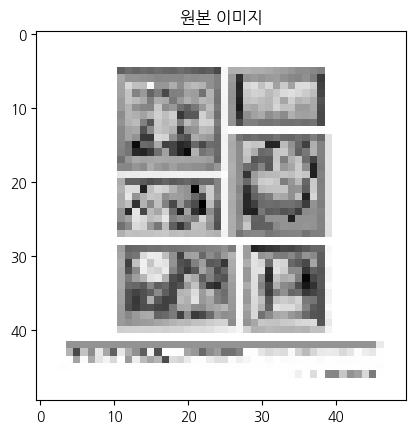

In [97]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.imshow(X=gray2.squeeze(), cmap="gray")
plt.title("원본 이미지")
plt.show()

In [102]:
relu1.shape

torch.Size([5, 48, 48])

Layer Name: First


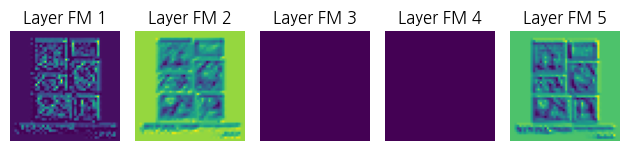

Layer Name: Second


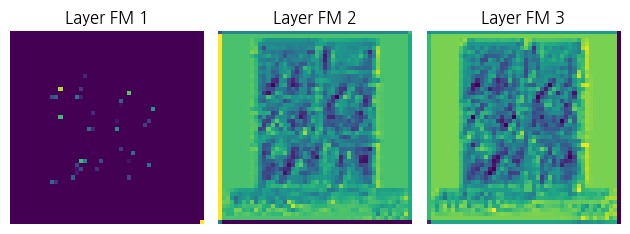

Layer Name: Finial


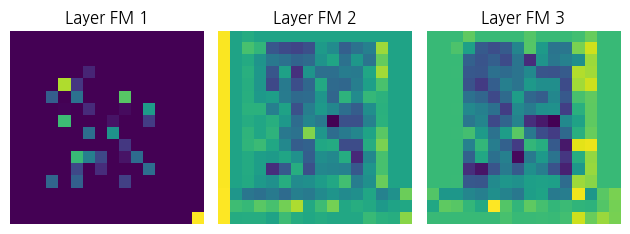

In [117]:
def print_featuremap(fm_tensor, cols, layer_name):
    print(f"Layer Name: {layer_name}")
    for idx in range(fm_tensor.shape[0]):
        plt.subplot(1,cols,idx+1)
        plt.imshow(fm_tensor[idx].detach().numpy())
        plt.title(label=f"Layer FM {idx+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print_featuremap(relu1, 5, "First")
print_featuremap(relu2, 3, "Second")
print_featuremap(mp1, 3, "Finial")